In [426]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import numpy as np
import umap

# Algoritmos de reducción de dimensionalidad
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

# Algoritmos clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score,silhouette_samples


from scipy.spatial.distance import cdist

In [427]:
dataset = pd.read_csv('SmartFarmingCropYield.csv')

# Análisis exploratorio de datos (EDA)

In [428]:
#Creamos copia del dataset original
df = dataset.copy()

#Renombramos las columnas para que no comiencen con un espacio
df.columns = df.columns.str.strip().str.replace(" ", "")

df.head()

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,tipoRiego,tipoFertilizante,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,estadoEnfermedadesCultivo
0,Trigo,35.95,5.99,17.79,75.62,77.03,7.27,NaN,Organico,6.34,122,4408.07,0.63,Leve
1,Soja,19.74,7.24,30.18,89.91,61.13,5.67,Aspersor,Inorganico,9.60,112,5389.98,0.58,NaN
2,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,Goteo,Mixto,15.26,144,2931.16,0.80,Leve
3,Maiz,17.33,6.03,33.73,212.01,70.46,5.03,Aspersor,Organico,25.80,134,4227.80,0.44,NaN
4,Soja,36.28,7.04,21.80,123.38,47.91,4.02,Manual,Mixto,39.29,145,4501.20,0.76,NaN


In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tipoCultivo                311 non-null    object 
 1   humedadSuelo(%)            311 non-null    float64
 2   pHSuelo                    311 non-null    float64
 3   temperatura(°C)            311 non-null    float64
 4   precipitacion(mm)          311 non-null    float64
 5   humedad(%)                 311 non-null    float64
 6   horasLuzSolar              311 non-null    float64
 7   tipoRiego                  220 non-null    object 
 8   tipoFertilizante           311 non-null    object 
 9   mlPesticida                311 non-null    float64
 10  diasTotales                311 non-null    int64  
 11  rendimientoKg_hectarea     311 non-null    float64
 12  indiceNDVI                 311 non-null    float64
 13  estadoEnfermedadesCultivo  228 non-null    object 

**Valores duplicados**

In [430]:
df.duplicated().values.any()

np.False_

**Valores faltantes**

In [431]:
df.isna().sum()

tipoCultivo                   0
humedadSuelo(%)               0
pHSuelo                       0
temperatura(°C)               0
precipitacion(mm)             0
humedad(%)                    0
horasLuzSolar                 0
tipoRiego                    91
tipoFertilizante              0
mlPesticida                   0
diasTotales                   0
rendimientoKg_hectarea        0
indiceNDVI                    0
estadoEnfermedadesCultivo    83
dtype: int64

In [432]:
df[df.isna().any(axis=1)]

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,tipoRiego,tipoFertilizante,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,estadoEnfermedadesCultivo
0,Trigo,35.95,5.99,17.79,75.62,77.03,7.27,NaN,Organico,6.34,122,4408.07,0.63,Leve
1,Soja,19.74,7.24,30.18,89.91,61.13,5.67,Aspersor,Inorganico,9.60,112,5389.98,0.58,NaN
3,Maiz,17.33,6.03,33.73,212.01,70.46,5.03,Aspersor,Organico,25.80,134,4227.80,0.44,NaN
4,Soja,36.28,7.04,21.80,123.38,47.91,4.02,Manual,Mixto,39.29,145,4501.20,0.76,NaN
8,Maiz,42.43,7.07,20.70,224.15,76.53,8.70,NaN,Organico,13.55,127,4942.95,0.65,Leve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Soja,40.46,7.44,18.31,237.68,59.21,8.68,NaN,Mixto,17.22,100,4287.59,0.77,Severo
305,Soja,19.06,7.20,20.93,117.13,45.96,5.34,Aspersor,Inorganico,6.76,149,2531.89,0.79,NaN
307,Trigo,28.81,7.46,30.56,245.13,45.32,8.47,NaN,Mixto,16.58,128,4203.51,0.65,Severo
308,Soja,34.22,6.75,17.46,256.23,45.14,5.78,NaN,Organico,5.05,104,3708.54,0.85,Severo


In [433]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

df

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,tipoRiego,tipoFertilizante,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,estadoEnfermedadesCultivo
0,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,Goteo,Mixto,15.26,144,2931.16,0.80,Leve
1,Maiz,27.10,5.72,22.26,296.33,80.34,5.44,Aspersor,Mixto,47.61,121,5264.09,0.70,Leve
2,Soja,40.54,6.35,19.24,184.82,76.50,5.21,Manual,Inorganico,49.78,118,5598.46,0.50,Leve
3,Trigo,13.39,6.36,23.47,166.76,76.45,8.04,Goteo,Organico,23.12,145,2437.08,0.55,Moderate
4,Soja,12.80,5.87,26.90,218.80,51.76,4.72,Aspersor,Mixto,31.75,116,4629.49,0.42,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Maiz,29.30,6.71,32.93,92.69,87.33,6.34,Manual,Mixto,35.50,128,5528.08,0.31,Leve
159,Maiz,26.91,6.03,15.04,207.79,59.68,9.54,Goteo,Inorganico,45.16,112,2023.56,0.30,Leve
160,Trigo,31.58,5.68,16.02,151.82,55.32,7.80,Aspersor,Organico,20.13,122,3708.29,0.47,Moderate
161,Maiz,32.14,7.44,21.49,286.61,84.20,5.58,Aspersor,Inorganico,45.43,93,4503.82,0.88,Leve


**Distrubuciones de las variables**

In [434]:
#Selección de columnas númericas
columnas_numericas = ['humedadSuelo(%)', 'pHSuelo', 'temperatura(°C)','precipitacion(mm)', 'humedad(%)', 'horasLuzSolar', 
'mlPesticida', 'rendimientoKg_hectarea', 'indiceNDVI', 'diasTotales']

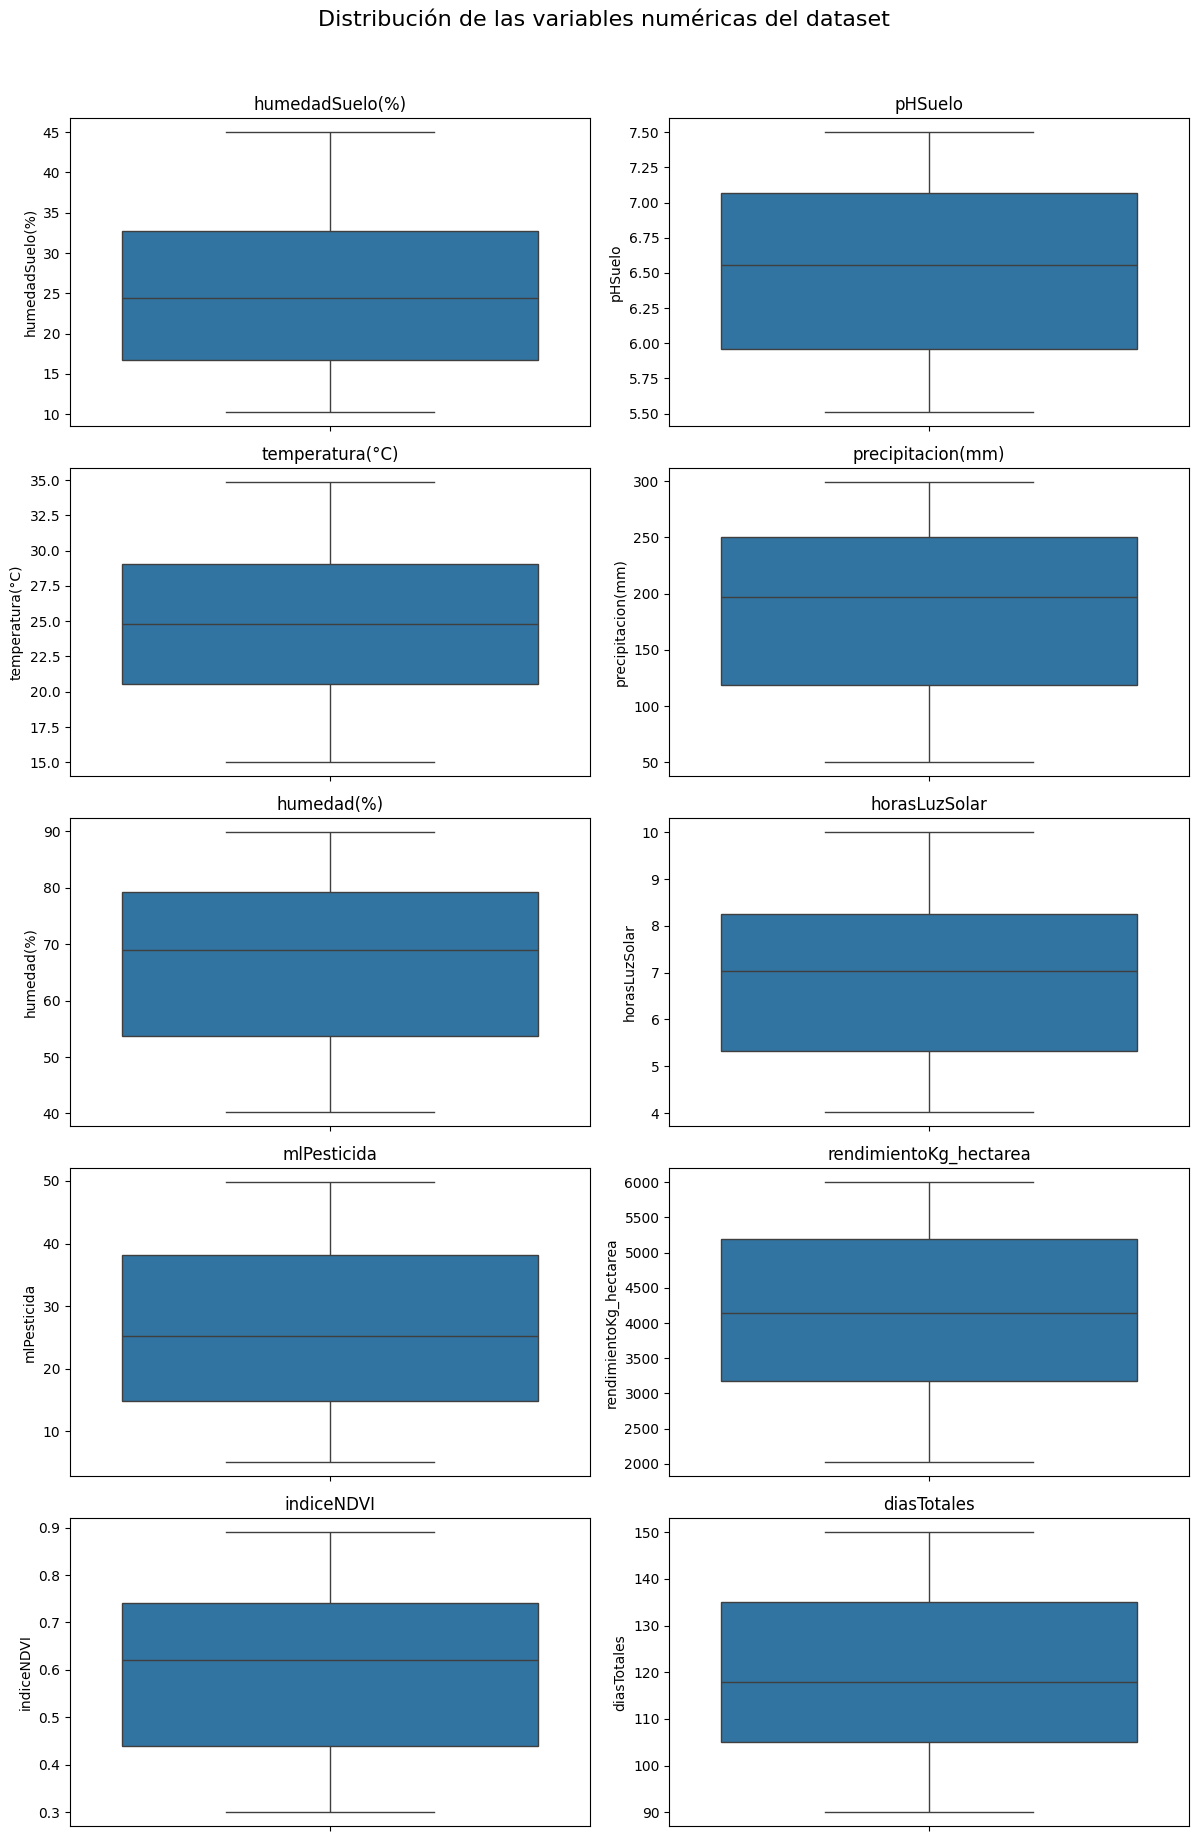

In [435]:
# Definimos el layout → 5 filas x 2 columnas = 10 subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))

# Aplanamos la grilla de ejes
axes = axes.flatten()

# Iteramos
for i, col in enumerate(columnas_numericas):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)


# Ajustamos diseño
fig.suptitle('Distribución de las variables numéricas del dataset', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Observando el gráfico de las distribución de las variables numéricas del dataset podemos ver que no encontramos valores atípicos, por lo cual no necesitamos ninguna tarea
de filtrado de outliers.


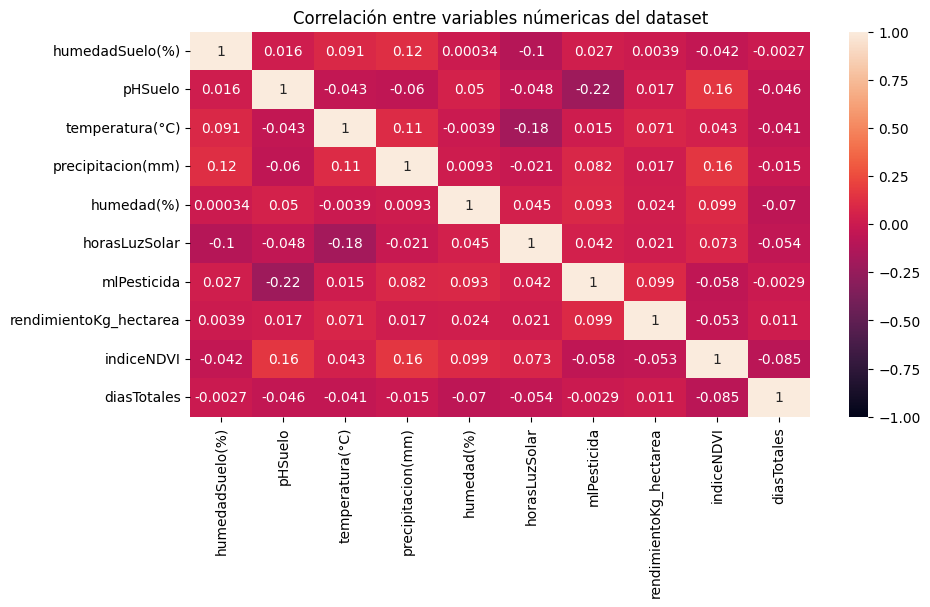

In [436]:
plt.figure(figsize=(10,5))
sns.heatmap(df[columnas_numericas].corr(), vmin=-1, vmax=1, annot=True)
plt.title('Correlación entre variables númericas del dataset')
plt.show()

A partir del gráfico se observa que las variables mlPesticida y pHSuelo presentan la correlación más alta del dataset.
Su relación linealmente decreciente (negativa) es muy débil, con un 0.22 de fuerza, lo que indica que las variables del 
dataset no muestran asociaciones lineales significativas.


**Codificación de variables catgorícas**

In [437]:
df = pd.get_dummies(data=df, columns=['tipoRiego', 'tipoFertilizante', 'estadoEnfermedadesCultivo'], drop_first=True)

#df['mas_120_dias'] = df['diasTotales'].apply(lambda x: True if x > 120 else False)
#df.drop(columns='diasTotales', inplace=True)

df

,tipoCultivo,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo
0,Trigo,29.32,7.16,27.37,265.43,68.87,8.23,15.26,144,2931.16,0.80,True,False,True,False,False,False
1,Maiz,27.10,5.72,22.26,296.33,80.34,5.44,47.61,121,5264.09,0.70,False,False,True,False,False,False
2,Soja,40.54,6.35,19.24,184.82,76.50,5.21,49.78,118,5598.46,0.50,False,True,False,False,False,False
3,Trigo,13.39,6.36,23.47,166.76,76.45,8.04,23.12,145,2437.08,0.55,True,False,False,True,True,False
4,Soja,12.80,5.87,26.90,218.80,51.76,4.72,31.75,116,4629.49,0.42,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Maiz,29.30,6.71,32.93,92.69,87.33,6.34,35.50,128,5528.08,0.31,False,True,True,False,False,False
159,Maiz,26.91,6.03,15.04,207.79,59.68,9.54,45.16,112,2023.56,0.30,True,False,False,False,False,False
160,Trigo,31.58,5.68,16.02,151.82,55.32,7.80,20.13,122,3708.29,0.47,False,False,False,True,True,False
161,Maiz,32.14,7.44,21.49,286.61,84.20,5.58,45.43,93,4503.82,0.88,False,False,False,False,False,False


**Normalización de las variables**

In [438]:
cols_bool = [
    "tipoRiego_Goteo",
    "tipoRiego_Manual",
    "tipoFertilizante_Mixto",
    "tipoFertilizante_Organico",
    "estadoEnfermedadesCultivo_Moderate",
    "estadoEnfermedadesCultivo_Severo"
]

X = df.drop(columns=['tipoCultivo'])
y = df['tipoCultivo']

scaler = StandardScaler()
x_num_escaladas = scaler.fit_transform(X[columnas_numericas])

x_escalado = X.copy()
x_escalado[columnas_numericas] = x_num_escaladas

x_escalado[cols_bool] = x_escalado[cols_bool].astype('int')

x_escalado

,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo
0,0.394017,1.040927,0.468253,1.084461,0.129232,0.715899,-0.807933,1.414415,-1.060408,1.132157,1,0,1,0,0,0
1,0.173440,-1.323141,-0.511037,1.501523,0.951804,-0.874106,1.589491,0.091070,0.961703,0.569187,0,0,1,0,0,0
2,1.508827,-0.288861,-1.089796,-0.003546,0.676418,-1.005182,1.750307,-0.081540,1.251525,-0.556753,0,1,0,0,0,0
3,-1.188775,-0.272444,-0.279151,-0.247304,0.672833,0.607619,-0.225437,1.471952,-1.488661,-0.275268,1,0,0,1,1,0
4,-1.247397,-1.076884,0.378181,0.455088,-1.097812,-1.284430,0.414123,-0.196613,0.411652,-1.007130,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.392030,0.302156,1.533782,-1.247039,1.453092,-0.361201,0.692032,0.493828,1.190522,-1.626397,0,1,1,0,0,0
159,0.154561,-0.814210,-1.894692,0.306484,-0.529829,1.462461,1.407924,-0.426760,-1.847087,-1.682694,1,0,0,0,0,0
160,0.618569,-1.388809,-1.706883,-0.448952,-0.842507,0.470845,-0.447022,0.148607,-0.386816,-0.725645,0,0,0,1,1,0
161,0.674210,1.500607,-0.658602,1.370331,1.228624,-0.794321,1.427933,-1.519958,0.302725,1.582534,0,0,0,0,0,0


# PCA

In [439]:
# Obtener todas las componentes principales
pca = PCA(n_components=x_escalado.shape[1])

pca_features = pca.fit_transform(x_escalado)

# PC dataframe
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9',
             'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16' ])
pca_df['tipoCultivo'] = y

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,tipoCultivo
0,-0.792205,1.387994,-0.249106,-1.240520,1.486727,0.092036,0.686264,0.788897,-0.080028,0.721274,-0.173658,-0.431566,-1.089214,-0.109730,0.379141,0.205612,Trigo
1,1.829135,0.373127,1.610806,-0.103827,0.341152,0.092011,0.729669,-1.324312,0.539950,-1.001053,-0.505400,-0.277519,-0.385297,-0.217318,-0.160022,0.611790,Maiz
2,1.717243,-0.320325,0.607422,1.116258,0.526360,1.503731,-0.546169,-1.425567,-0.349536,-0.775448,-0.299092,0.332159,0.237228,-0.600584,0.147504,-0.031785,Soja
3,-0.909957,-1.205800,0.076234,-0.968990,0.223515,0.332274,1.718173,0.646215,0.324343,0.623970,0.960097,0.349091,-0.496294,0.257589,0.234220,-0.170357,Trigo
4,1.203857,-0.882238,-0.726363,-0.158559,-1.042544,-1.478319,0.364594,-1.122641,0.677980,-0.074391,-0.355361,0.238594,-0.497282,0.294070,-0.367808,0.272103,Soja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,1.310045,-0.378169,-0.317706,2.557864,-0.399234,0.700807,0.648770,0.899784,-0.217800,0.558903,-0.974926,0.429983,-0.434588,-0.126167,0.511543,0.328591,Maiz
159,-0.024472,-2.296216,1.122151,-1.932434,-0.448965,1.403694,-1.108097,-0.672703,0.136606,1.231940,0.046666,-0.259379,-0.404603,-0.536295,0.201716,-0.123407,Maiz
160,-0.141585,-1.861031,-0.296660,-1.112751,0.116593,0.638945,-0.993456,0.031583,0.411763,-1.112083,0.695012,0.379379,0.060247,0.186552,-0.439551,0.326600,Trigo
161,-0.055507,2.454070,1.688830,0.420251,0.068840,0.897480,-0.227859,-2.013789,-0.289125,0.101214,0.155578,0.097038,0.140329,-0.614739,-0.442835,0.215465,Maiz


**selección del número de componentes principales**

Para obtener el número de coponentes principlaes, utilizamos como criterio acumular el 75% de varianza 

In [440]:
# Creamos función para acumular la varianza
def acumular(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

In [441]:
var_c = acumular(pca.explained_variance_ratio_)
pca_rtd = pd.DataFrame({'Eigenvalues':pca.explained_variance_,
                        'Proporción de variancia explicada':pca.explained_variance_ratio_,
                        'Proporción acumulado de variancia explicada': var_c})
pca_rtd

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,1.373047,0.120600,0.120600
1,1.333860,0.117158,0.237758
2,1.266083,0.111205,0.348963
3,1.051417,0.092350,0.441313
4,0.990039,0.086959,0.528272
5,0.970020,0.085201,0.613472
6,0.938075,0.082395,0.695867
7,0.796183,0.069932,0.765799
8,0.752830,0.066124,0.831923
9,0.678837,0.059625,0.891547


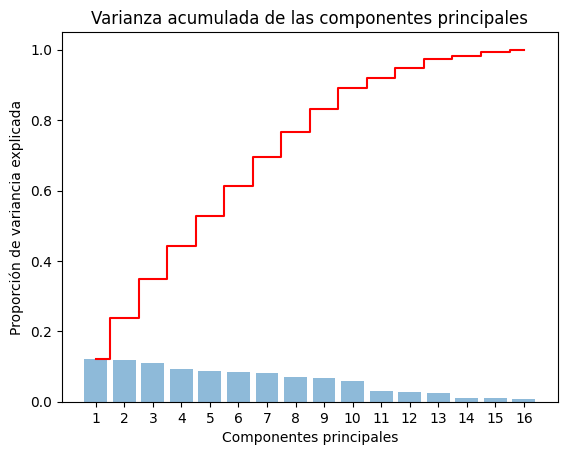

In [442]:
plt.bar(range(1,17), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(1,17), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.title('Varianza acumulada de las componentes principales')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componentes principales')
plt.xticks([x for x in range(1,17,1)])
plt.show()

A partir del gráfico podemos observar que la varianza explicada por las cada componente principal es muy baja, siendo que PC1 solo explica el 12% de la varianza, y 
es similar entre el resto de componentes. Por esta razón, para acumular el 75% varianza explicada es necesario usar 7 componentes principales.

In [443]:
pca_filtrado = pca_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'tipoCultivo']]

In [444]:
features = pca_filtrado.drop(columns=['tipoCultivo']).columns.to_list()

unique_tipoCultivo = pca_filtrado['tipoCultivo'].unique()
num_colors = len(unique_tipoCultivo)
color_palette = plt.get_cmap('tab20', num_colors)

tipoCultivo_color_map = {cultivo: mcolors.to_hex(color_palette(i)) for i,
                         cultivo in enumerate(unique_tipoCultivo)}

fig = px.scatter(pca_features, x=0, y=1, color = pca_filtrado["tipoCultivo"],
                 labels={'0': 'PC1', '1': 'PC2','color': 'tipoCultivo'},
                 color_discrete_map=tipoCultivo_color_map,
                 title="Distribución de tipoCultivo en 2 dimensiones")

fig.show()

In [445]:
features = pca_filtrado.drop(columns=['tipoCultivo']).columns.to_list()

unique_tipoCultivo = pca_filtrado['tipoCultivo'].unique()
num_colors = len(unique_tipoCultivo)
color_palette = plt.get_cmap('tab20', num_colors)

tipoCultivo_color_map = {cultivo: mcolors.to_hex(color_palette(i)) for i,
                         cultivo in enumerate(unique_tipoCultivo)}

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig = px.scatter(pca_features, x=0, y=1, color = pca_filtrado["tipoCultivo"],
                 labels={'color': 'tipoCultivo'},
                 color_discrete_map=tipoCultivo_color_map,
                 title="PCA de tipoCultivo en 2 dimensiones")

fig.show()

El gráfico en 2d, generado a partir de PC1 y PC2 solo explica el 23% de la varianza de los datos, es por esta razón que vemos los datos dispersos.

# ISOMAP

In [483]:
isomap = Isomap(n_neighbors=5, n_components=2)
X_reduced = isomap.fit_transform(x_escalado)

df_isomap = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
df_isomap['tipoCultivo'] = y

Ajustando una cantidad de vecinos baja (5) obtenemos un gráfico donde no se llegá a apreciar ninguna separción clara de grupos como consecuencia de utilizar solo dos componentes, que no son suficientes para explicar la varianza de los datos.

In [484]:
fig_isomap_2d = px.scatter(df_isomap, x='PC1', y='PC2', color='tipoCultivo',
                    labels = {'color':'tipoCultivo', 0:'PC1',1:'PC2'},
                    title='ISOMAP de tipoCultivo en 2 dimensiones')
fig_isomap_2d.show()

# T-SNE

In [465]:
tsne = TSNE(n_components=2, random_state=42, max_iter=3000, perplexity=5) 
X_reduced_tsne = tsne.fit_transform(x_escalado)

tsne_df = pd.DataFrame(data=X_reduced_tsne, columns=['PC1', 'PC2'])
tsne_df['tipoCultivo'] = y

Ajustando un perplejidad baja (5) y una cantidad de iteraciones alta (3000) aseguramos que el algoritmo converja, facilitando una visualización clara y destacando algunos grupos 
dentro de los datos.

In [468]:
fig_tsne_2d = px.scatter(tsne_df, x='PC1', y='PC2', color = y,
                         labels = {'color':'tipoCultivo', 0:'PC1',1:'PC2'},
                         title='T-SNE de tipoCultivo en 2 dimensiones')
fig_tsne_2d.show()

# K-MEANS

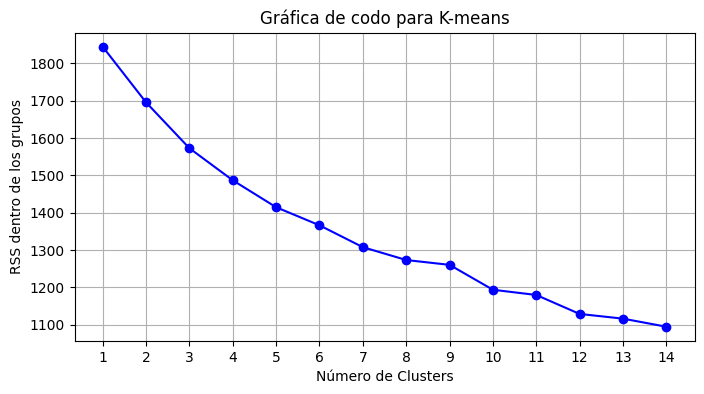

In [450]:
Nc = range(1, 15)
kmeans = [KMeans(n_clusters=k, random_state=42).fit(x_escalado) for k in Nc]

# La suma de residuos cuadrados intra grupos de kMeans en sklearn se guarda en el atributo inertia
inertias = [model.inertia_ for model in kmeans]

plt.figure(figsize=(8, 4))
plt.plot(Nc,inertias, "bo-")
plt.xlabel('Número de Clusters')
plt.xticks([x for x in range(1,15,1)])
plt.ylabel('RSS dentro de los grupos')
plt.title('Gráfica de codo para K-means')
plt.grid()
plt.show()

**GAP**

In [451]:
def calculate_intra_cluster_dispersion(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42) 
    kmeans.fit(X)
    return kmeans.inertia_

In [452]:
gaps = []
max_k = 10

# Calcula el Gap Statistic para determinar el número óptimo de clusters
for k in range(1, max_k + 1):
    # Calculo la inercia real sobre mis datos reales
    real_inertia = calculate_intra_cluster_dispersion(x_escalado, k)
    #Calculo la inercia de datos aleatorios con la misma estructura que mis datos originales
    inertia_list = []
    for _ in range(10):
      random_data = np.random.rand(*x_escalado.shape)
      intra_cluster_dispersion = calculate_intra_cluster_dispersion(random_data, k)
      inertia_list.append(intra_cluster_dispersion)

    reference_inertia = np.mean(inertia_list)

    #Aplico la funcion de gap
    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)

#se selecciona el valor de k (número de clusters) que maximiza el Gap Statistic.
optimal_kmeans = np.argmax(gaps) + 1

print("Número óptimo de clusters según el Gap Statistic:", optimal_kmeans)

Número óptimo de clusters según el Gap Statistic: 10


In [469]:
# Creamos el modelo 
kmeans = KMeans(n_clusters=10, random_state=42) #init='k-means++', n_init=5, algorithm='lloyd'
kmeans.fit(x_escalado) 

# Guardamos las etiquetas
df_kmeans = x_escalado.copy()

# El metodo labels_ nos da a que cluster corresponde cada observacion
df_kmeans['Etiquetas KMeans'] = kmeans.labels_
df_kmeans['Etiquetas KMeans'] = df_kmeans['Etiquetas KMeans'].astype('category')

df_kmeans.head()

,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo,Etiquetas KMeans
0,0.394017,1.040927,0.468253,1.084461,0.129232,0.715899,-0.807933,1.414415,-1.060408,1.132157,1,0,1,0,0,0,4
1,0.173440,-1.323141,-0.511037,1.501523,0.951804,-0.874106,1.589491,0.091070,0.961703,0.569187,0,0,1,0,0,0,5
2,1.508827,-0.288861,-1.089796,-0.003546,0.676418,-1.005182,1.750307,-0.081540,1.251525,-0.556753,0,1,0,0,0,0,5
3,-1.188775,-0.272444,-0.279151,-0.247304,0.672833,0.607619,-0.225437,1.471952,-1.488661,-0.275268,1,0,0,1,1,0,3
4,-1.247397,-1.076884,0.378181,0.455088,-1.097812,-1.284430,0.414123,-0.196613,0.411652,-1.007130,0,0,1,0,1,0,2


In [454]:
fig = px.scatter_3d(df_kmeans, x='rendimientoKg_hectarea', y='precipitacion(mm)', z='humedad(%)',
                    color='Etiquetas KMeans',
                    title='K-means de tipoCultivo en 3 dimensiones')
fig.show()

# Clustering jerarquico

**dendrograma**

In [455]:
Z = linkage(x_escalado, "ward")

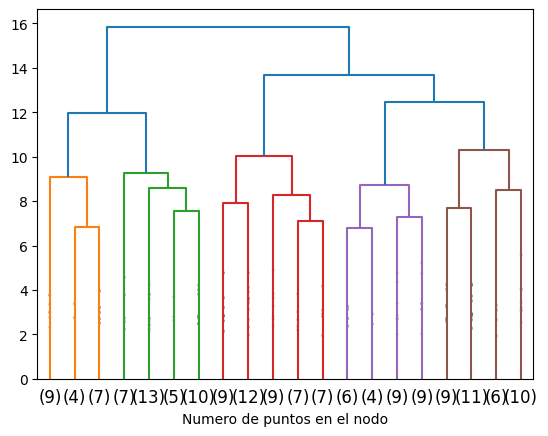

In [456]:
dendrogram(Z,  truncate_mode = 'lastp', p = 20, show_leaf_counts = True, show_contracted = True)
plt.axhline(y=110, c='k', linestyle='dashed')
plt.xlabel("Numero de puntos en el nodo")
plt.show()

**GAP**

In [457]:
def calculate_intra_cluster_dispersion_clustering(X_scaled, k, linkage='ward'):
    clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    labels = clustering.fit_predict(X_scaled)
    X_arr = np.array(X_scaled)  
    centroids = np.array([np.mean(X_arr[labels == i], axis=0) for i in range(k)])
    intra_cluster_dispersion = np.sum(np.linalg.norm(X_arr - centroids[labels], axis=1)**2)
    return intra_cluster_dispersion


In [458]:
gaps = []
max_k = 15
for k in range(1, max_k + 1):
    real_inertia = calculate_intra_cluster_dispersion_clustering(x_escalado, k, linkage='ward')

    inertia_list = []
    for _ in range(10):
      random_data = np.random.rand(*x_escalado.shape)
      intra_cluster_dispersion = calculate_intra_cluster_dispersion_clustering(random_data, k)
      inertia_list.append(intra_cluster_dispersion)

    reference_inertia = np.mean(inertia_list)

    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)

optimal_k = np.argmax(gaps) + 1

Número óptimo de clusters según el Gap Statistic: 15


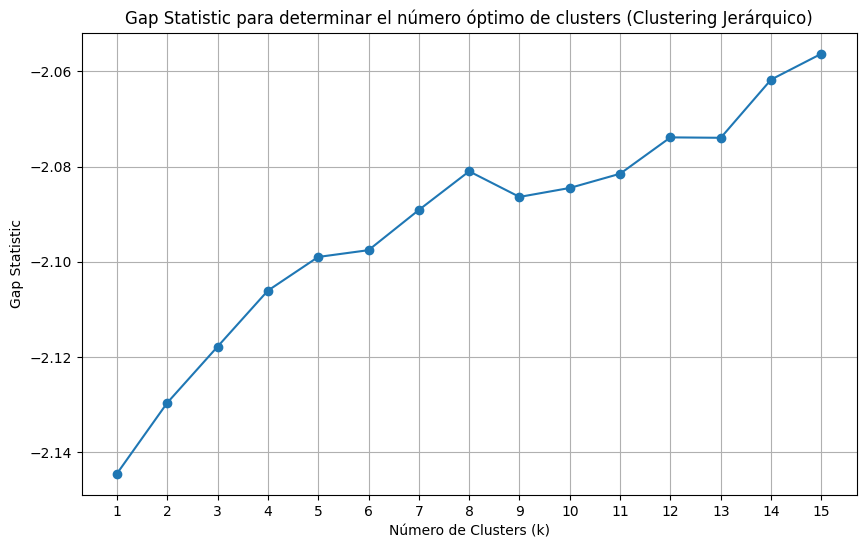

In [459]:
print("Número óptimo de clusters según el Gap Statistic:", optimal_k)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), gaps, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic para determinar el número óptimo de clusters (Clustering Jerárquico)')
plt.xticks([x for x in range(1,16,1)])
plt.grid()
plt.show()

In [460]:
n_clusters = 14

clustering = AgglomerativeClustering(n_clusters=n_clusters)

cluster_assignments = clustering.fit_predict(x_escalado) # Asigna los clusters a los datos

df_clustering = x_escalado.copy()

df_clustering['Etiquetas jerarquico'] = cluster_assignments # Añade la columna con el cluster asignado a cada punto

df_clustering.head()

,humedadSuelo(%),pHSuelo,temperatura(°C),precipitacion(mm),humedad(%),horasLuzSolar,mlPesticida,diasTotales,rendimientoKg_hectarea,indiceNDVI,tipoRiego_Goteo,tipoRiego_Manual,tipoFertilizante_Mixto,tipoFertilizante_Organico,estadoEnfermedadesCultivo_Moderate,estadoEnfermedadesCultivo_Severo,Etiquetas jerarquico
0,0.394017,1.040927,0.468253,1.084461,0.129232,0.715899,-0.807933,1.414415,-1.060408,1.132157,1,0,1,0,0,0,0
1,0.173440,-1.323141,-0.511037,1.501523,0.951804,-0.874106,1.589491,0.091070,0.961703,0.569187,0,0,1,0,0,0,10
2,1.508827,-0.288861,-1.089796,-0.003546,0.676418,-1.005182,1.750307,-0.081540,1.251525,-0.556753,0,1,0,0,0,0,7
3,-1.188775,-0.272444,-0.279151,-0.247304,0.672833,0.607619,-0.225437,1.471952,-1.488661,-0.275268,1,0,0,1,1,0,2
4,-1.247397,-1.076884,0.378181,0.455088,-1.097812,-1.284430,0.414123,-0.196613,0.411652,-1.007130,0,0,1,0,1,0,10


In [461]:
fig = px.scatter_3d(df_clustering, x='rendimientoKg_hectarea', y='precipitacion(mm)', z='humedad(%)',
                    color='Etiquetas jerarquico',
                    title='Clustering de tipoCultivo en 3 dimensiones')
fig.show()

In [462]:
silhouette_avg = silhouette_score(x_escalado, cluster_assignments)
silhouette_avg

0.06274172371554158

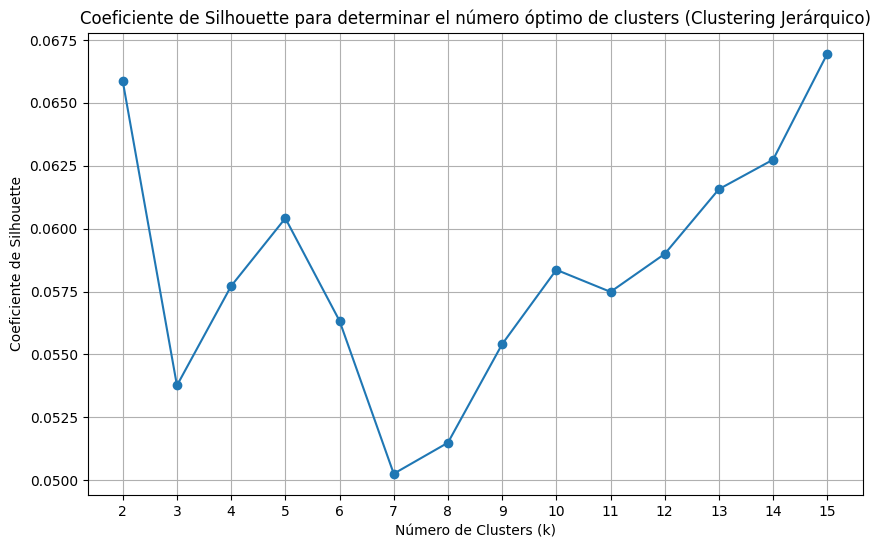

In [463]:
def calculate_silhouette(X_scaled, k, linkage='ward'):
    clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    labels = clustering.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    sample_silhouette_values = silhouette_samples(X_scaled, labels)
    return silhouette_avg, sample_silhouette_values

max_k = 15

silhouette_scores = []
for k in range(2, max_k + 1):
    silhouette_avg, _ = calculate_silhouette(x_escalado, k)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Coeficiente de Silhouette para determinar el número óptimo de clusters (Clustering Jerárquico)')
plt.xticks([x for x in range(2, 16, 1)])
plt.grid()
plt.show()

# Test

Número óptimo de clusters según el Gap Statistic (ward/euclidean): 15


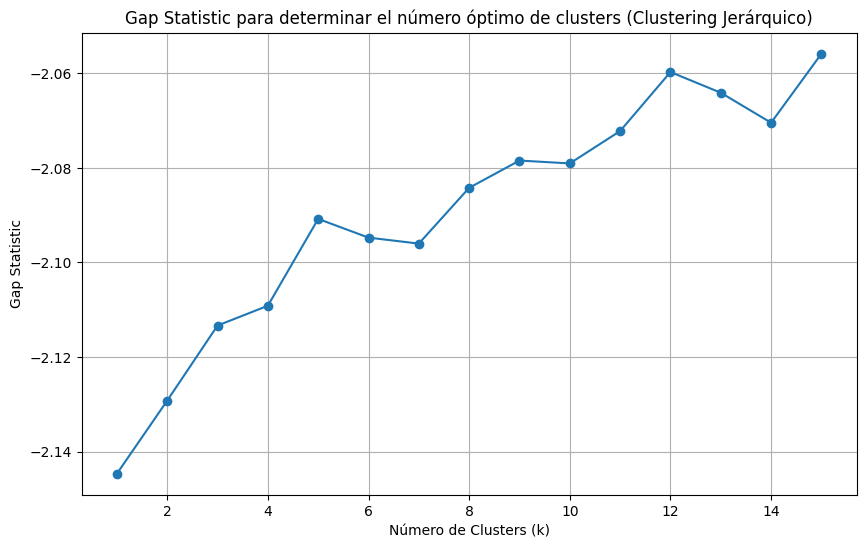


Buscando la mejor combinación de parámetros y k con Silhouette Score:
  Linkage: ward, Métrica: euclidean, k: 13, Silhouette: 0.0616
  Linkage: ward, Métrica: euclidean, k: 14, Silhouette: 0.0627
  Linkage: ward, Métrica: euclidean, k: 15, Silhouette: 0.0670


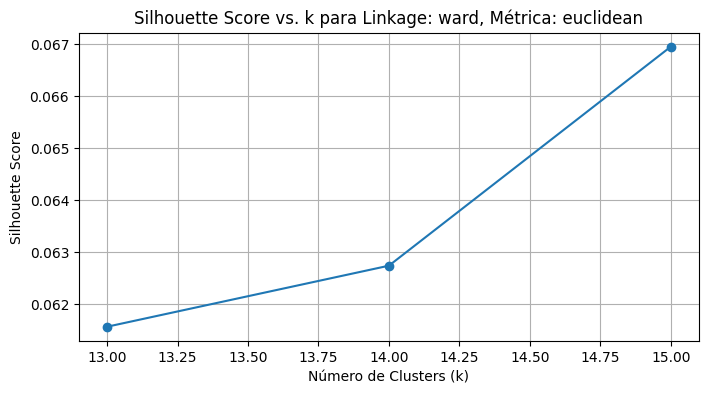

  Linkage: complete, Métrica: euclidean, k: 13, Silhouette: 0.0372
  Linkage: complete, Métrica: euclidean, k: 14, Silhouette: 0.0427
  Linkage: complete, Métrica: euclidean, k: 15, Silhouette: 0.0469


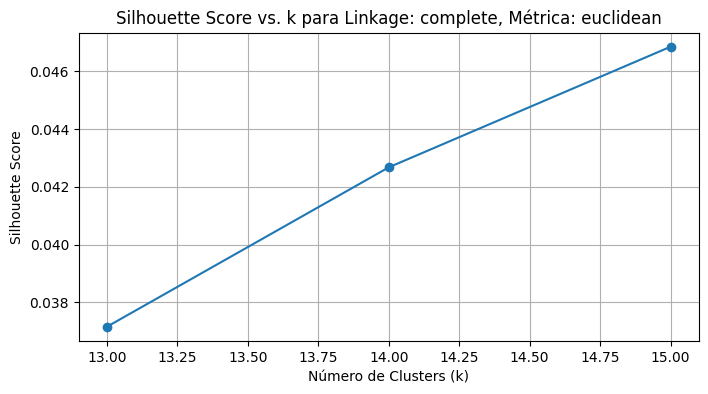

  Linkage: complete, Métrica: manhattan, k: 13, Silhouette: 0.0393
  Linkage: complete, Métrica: manhattan, k: 14, Silhouette: 0.0403
  Linkage: complete, Métrica: manhattan, k: 15, Silhouette: 0.0387


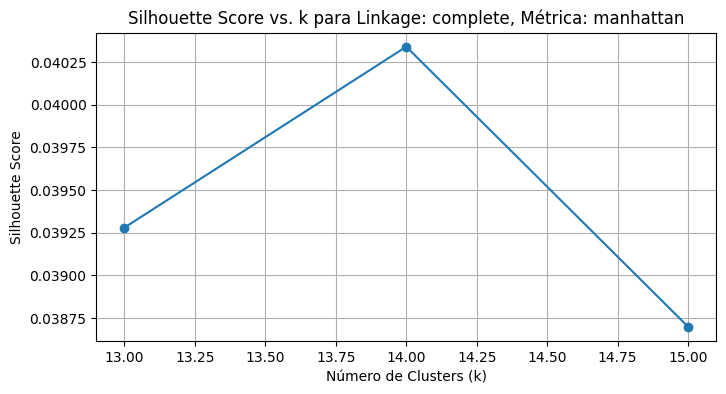

  Linkage: complete, Métrica: cosine, k: 13, Silhouette: 0.0445
  Linkage: complete, Métrica: cosine, k: 14, Silhouette: 0.0539
  Linkage: complete, Métrica: cosine, k: 15, Silhouette: 0.0557


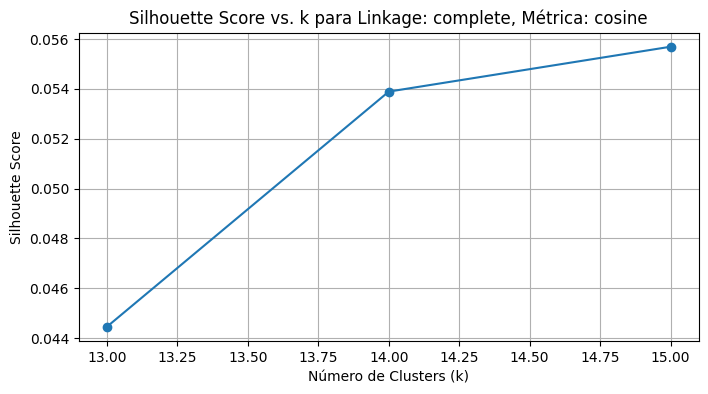

  Linkage: average, Métrica: euclidean, k: 13, Silhouette: 0.0332
  Linkage: average, Métrica: euclidean, k: 14, Silhouette: 0.0424
  Linkage: average, Métrica: euclidean, k: 15, Silhouette: 0.0442


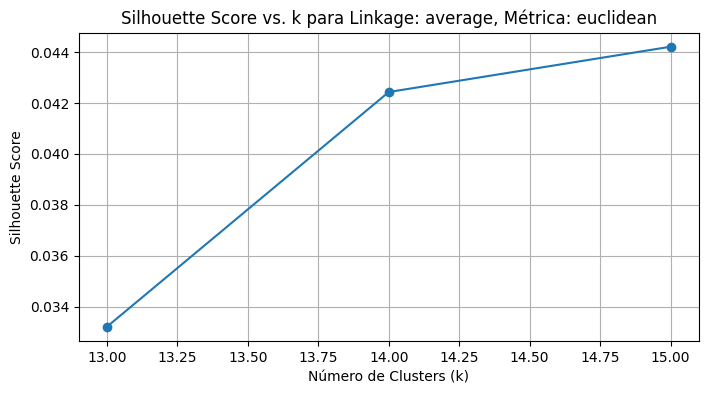

  Linkage: average, Métrica: manhattan, k: 13, Silhouette: 0.0359
  Linkage: average, Métrica: manhattan, k: 14, Silhouette: 0.0386
  Linkage: average, Métrica: manhattan, k: 15, Silhouette: 0.0403


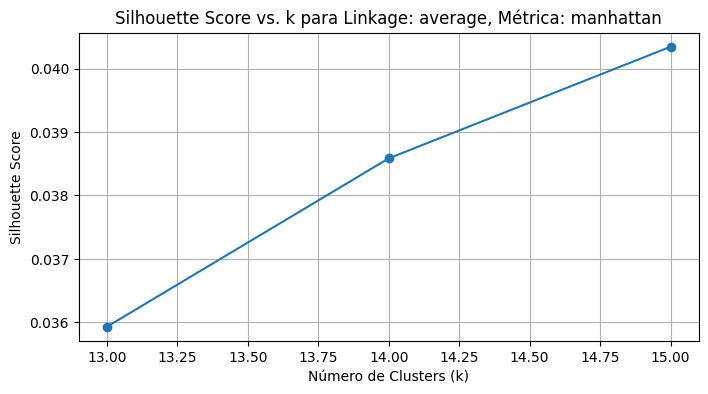

  Linkage: average, Métrica: cosine, k: 13, Silhouette: 0.0631
  Linkage: average, Métrica: cosine, k: 14, Silhouette: 0.0640
  Linkage: average, Métrica: cosine, k: 15, Silhouette: 0.0637


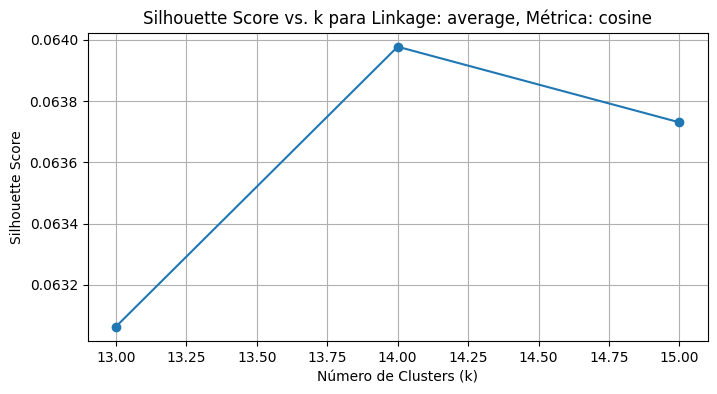

  Linkage: single, Métrica: euclidean, k: 13, Silhouette: -0.1360
  Linkage: single, Métrica: euclidean, k: 14, Silhouette: -0.1375
  Linkage: single, Métrica: euclidean, k: 15, Silhouette: -0.1417


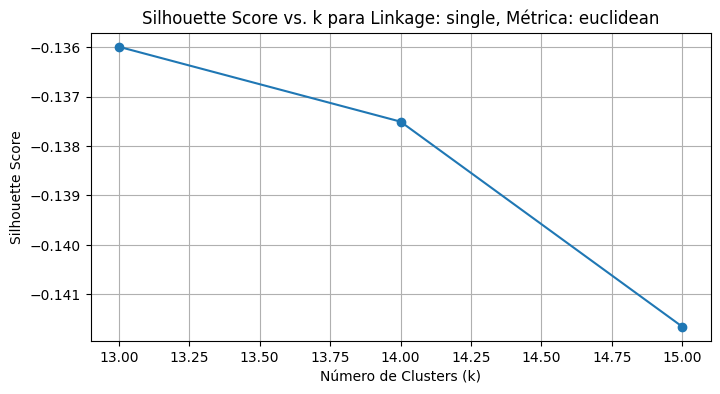

  Linkage: single, Métrica: manhattan, k: 13, Silhouette: -0.1552
  Linkage: single, Métrica: manhattan, k: 14, Silhouette: -0.1564
  Linkage: single, Métrica: manhattan, k: 15, Silhouette: -0.1790


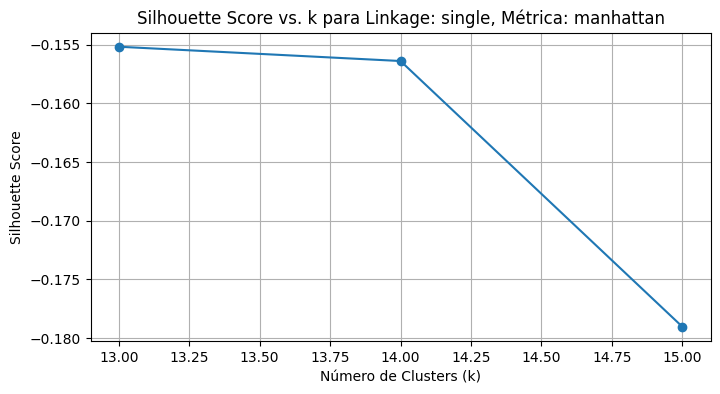

  Linkage: single, Métrica: cosine, k: 13, Silhouette: -0.2196
  Linkage: single, Métrica: cosine, k: 14, Silhouette: -0.2177
  Linkage: single, Métrica: cosine, k: 15, Silhouette: -0.2027


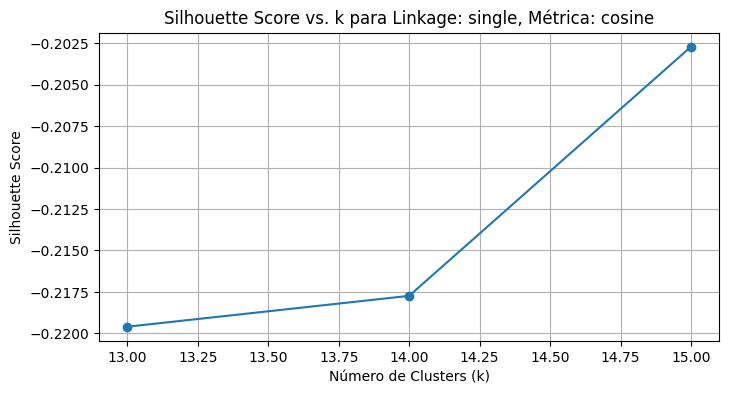


--- Resultados Óptimos ---
Mejor Silhouette Score: 0.0670
Parámetros Óptimos: {'linkage': 'ward', 'metric': 'euclidean', 'n_clusters': 15}


In [464]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Asumiendo que x_escalado ya está definido y es tu DataFrame escalado
# x_escalado = ...

linkage_methods = ['ward', 'complete', 'average', 'single']
distance_metrics = ['euclidean', 'manhattan', 'cosine'] # 'ward' solo funciona con 'euclidean'

best_silhouette = -1
best_params = {}
best_cluster_assignments = None

# Primero, vamos a encontrar un k más robusto
# Tu implementación del Gap Statistic es buena, vamos a mantenerla para encontrar un k_inicial
def calculate_intra_cluster_dispersion_clustering(X_scaled, k, linkage_method, metric_val='euclidean'):
    # Ward solo funciona con euclidean
    if linkage_method == 'ward':
        clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage_method)
    else:
        clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage_method, metric=metric_val)

    labels = clustering.fit_predict(X_scaled)
    X_arr = np.array(X_scaled)
    # Evitar error si un cluster está vacío
    centroids = []
    for i in range(k):
        if np.sum(labels == i) > 0:
            centroids.append(np.mean(X_arr[labels == i], axis=0))
        else:
            # Si un cluster está vacío, podrías asignarle el centroide de otro cluster o simplemente manejarlo
            # Aquí, para simplificar, le asignamos el centroide de todo el dataset, lo cual no es ideal
            # pero evita un error si calculate_intra_cluster_dispersion_clustering es llamado con un k demasiado grande
            centroids.append(np.mean(X_arr, axis=0))
    centroids = np.array(centroids)

    # Asegurarse de que labels tenga la misma longitud que X_arr
    intra_cluster_dispersion = np.sum(np.linalg.norm(X_arr - centroids[labels], axis=1)**2)
    return intra_cluster_dispersion

gaps = []
max_k = 15
# Para el Gap Statistic, usualmente se usa 'ward' con 'euclidean'
# Podrías ejecutar el Gap Statistic para cada combinación si quieres, pero es computacionalmente costoso.
# Nos quedaremos con 'ward' para encontrar un k inicial, y luego lo afinaremos con silhouette.
for k in range(1, max_k + 1):
    real_inertia = calculate_intra_cluster_dispersion_clustering(x_escalado, k, linkage_method='ward')

    inertia_list = []
    for _ in range(10): # Reduce el número de iteraciones para mayor velocidad si es necesario
      random_data = np.random.rand(*x_escalado.shape)
      intra_cluster_dispersion = calculate_intra_cluster_dispersion_clustering(random_data, k, linkage_method='ward')
      inertia_list.append(intra_cluster_dispersion)

    reference_inertia = np.mean(inertia_list)

    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)

optimal_k_gap = np.argmax(gaps) + 1
print(f"Número óptimo de clusters según el Gap Statistic (ward/euclidean): {optimal_k_gap}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), gaps, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic para determinar el número óptimo de clusters (Clustering Jerárquico)')
plt.grid(True)
plt.show()

# Ahora, afinemos con Silhouette para k alrededor del óptimo_k_gap y diferentes combinaciones
# Rango de k a explorar, por ejemplo, 2 valores por debajo y 2 por encima del k óptimo
k_range_to_explore = range(max(2, optimal_k_gap - 2), min(max_k + 1, optimal_k_gap + 3))

print("\nBuscando la mejor combinación de parámetros y k con Silhouette Score:")
for linkage in linkage_methods:
    for metric in distance_metrics:
        if linkage == 'ward' and metric != 'euclidean':
            continue # Ward solo funciona con euclidean
        if linkage != 'ward' and metric == 'euclidean': # Si no es ward, euclidean es una opción común
            pass
        elif linkage != 'ward' and metric != 'euclidean': # Para otros linkages y metricas
             pass
        elif linkage == 'ward' and metric == 'euclidean': # Combinación específica
            pass
        else:
            continue # Saltar otras combinaciones no válidas o redundantes

        silhouette_scores_per_k = []
        for n_clusters in k_range_to_explore:
            try:
                if linkage == 'ward':
                    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
                else:
                    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=metric)
                
                cluster_assignments = clustering.fit_predict(x_escalado)

                # Asegurarse de que hay al menos 2 clusters para calcular silhouette score
                if len(np.unique(cluster_assignments)) > 1:
                    silhouette_avg = silhouette_score(x_escalado, cluster_assignments)
                    silhouette_scores_per_k.append((n_clusters, silhouette_avg))

                    print(f"  Linkage: {linkage}, Métrica: {metric}, k: {n_clusters}, Silhouette: {silhouette_avg:.4f}")

                    if silhouette_avg > best_silhouette:
                        best_silhouette = silhouette_avg
                        best_params = {'linkage': linkage, 'metric': metric, 'n_clusters': n_clusters}
                        best_cluster_assignments = cluster_assignments
                else:
                    print(f"  Advertencia: Para Linkage: {linkage}, Métrica: {metric}, k: {n_clusters}, solo se formó 1 cluster. No se puede calcular Silhouette Score.")

            except Exception as e:
                print(f"  Error al procesar Linkage: {linkage}, Métrica: {metric}, k: {n_clusters}. Error: {e}")
                
        # Opcional: Graficar los scores de silueta para esta combinación de linkage/metric
        if silhouette_scores_per_k:
            k_values = [s[0] for s in silhouette_scores_per_k]
            scores = [s[1] for s in silhouette_scores_per_k]
            plt.figure(figsize=(8, 4))
            plt.plot(k_values, scores, marker='o')
            plt.xlabel('Número de Clusters (k)')
            plt.ylabel('Silhouette Score')
            plt.title(f'Silhouette Score vs. k para Linkage: {linkage}, Métrica: {metric}')
            plt.grid(True)
            plt.show()


print("\n--- Resultados Óptimos ---")
print(f"Mejor Silhouette Score: {best_silhouette:.4f}")
print(f"Parámetros Óptimos: {best_params}")

# Visualización con los mejores parámetros
if best_cluster_assignments is not None:
    df_clustering = x_escalado.copy()
    df_clustering['Etiquetas jerarquico'] = best_cluster_assignments

    fig = px.scatter_3d(df_clustering, x='rendimientoKg_hectarea', y='precipitacion(mm)', z='humedad(%)',
                        color='Etiquetas jerarquico',
                        title=f'Dispersión de las variedades de trigo (Clustering Jerárquico Optimizada)\n'
                              f'Linkage: {best_params["linkage"]}, Métrica: {best_params["metric"]}, k: {best_params["n_clusters"]}')
    fig.show()
else:
    print("No se encontraron asignaciones de clusters óptimas.")